In [1]:
from topicnet.cooking_machine.models import TopicModel
from topicnet.cooking_machine.model_constructor import init_simple_default_model

from topicnet.cooking_machine.dataset import Dataset


In [2]:
PATH = '/data/datasets/RTL_WIKI2/wiki_data.csv'
BATCHES = './RTLWiki_batches'

dataset = Dataset(PATH, batch_vectorizer_path=BATCHES)

In [3]:
dataset.get_possible_modalities()

{'@bigram', '@lemmatized'}

In [4]:
modalities = {
    "@lemmatized": 1.0,
    "@bigram": 3,
}



In [5]:
from run_search import _optimize_scores, _build_renyi_entropy_score, _build_perplexity_score

In [6]:
vw_file_path = "RTL_vw.txt"

dataset.write_vw(vw_file_path)


In [6]:
# TODO: instead of modalities let's use predefined model families
# TODO: output_file_path


In [7]:
main_modality_name, modalities = "@lemmatized", modalities

modality_names = list(modalities.keys())

# vw_file_path = args.vw_file_path

output_file_path = "output.json"

min_num_topics = 13
max_num_topics = 25

num_topics_interval = 1
num_fit_iterations = 10
num_restarts = 6


In [8]:


threshold_factor = 1

scores = [_build_renyi_entropy_score(threshold_factor, modality_names)]



In [9]:
import time

In [10]:
from topnum.data.vowpal_wabbit_text_collection import VowpalWabbitTextCollection
from topnum.scores import (
    PerplexityScore,
    EntropyScore
)
from topnum.search_methods.optimize_scores_method import OptimizeScoresMethod


text_collection = VowpalWabbitTextCollection(
    vw_file_path,
    main_modality=main_modality_name,
    modalities=modalities
)

optimizer = OptimizeScoresMethod(
    scores=scores,
    min_num_topics=min_num_topics,
    max_num_topics=max_num_topics,
    num_topics_interval=num_topics_interval,
    num_fit_iterations=num_fit_iterations,
    num_restarts=num_restarts,
    # experiment_name="num_topics_search_10iters"
)



In [11]:
t_start = time.time()
optimizer.search_for_optimum(text_collection)



/home/bulatov/anaconda3/lib/python3.7/site-packages/topicnet/cooking_machine/dataset.py:364: UserWarning: Attempted to use batches for different dataset.Overwriting batches in _dataset_y2e3s1m0/dataset_batches
  warnings.warn(W_DIFF_BATCHES_1 + W_DIFF_BATCHES_2.format(batch_vectorizer_path))
  0%|          | 0/6 [00:00<?, ?it/s]

num_topics_experiments


 17%|█▋        | 1/6 [1:06:34<5:32:52, 3994.56s/it]

num_topics_experiments


 33%|███▎      | 2/6 [2:10:40<4:23:19, 3949.98s/it]

num_topics_experiments


 50%|█████     | 3/6 [3:14:10<3:15:24, 3908.04s/it]

num_topics_experiments


 67%|██████▋   | 4/6 [4:18:02<2:09:30, 3885.30s/it]

num_topics_experiments


 83%|████████▎ | 5/6 [5:21:10<1:04:16, 3856.06s/it]

num_topics_experiments


100%|██████████| 6/6 [6:25:07<00:00, 3850.28s/it]  


In [ ]:
! ls  num_topics_experiments/e68cc1ff_experiment_-1 -lh


In [12]:
t_end = time.time()

t_end - t_start

23985.79033613205

In [13]:
detailed_result = optimizer._detailed_result

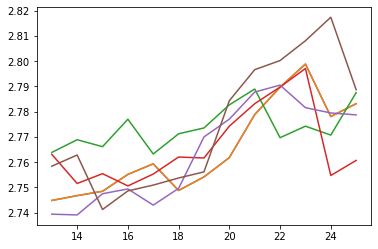

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(detailed_result['renyi_entropy_score'].T)

plt.show()

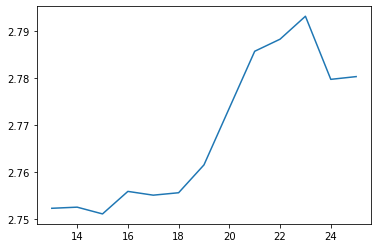

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(detailed_result['renyi_entropy_score'].T.mean(axis=1))

plt.show()

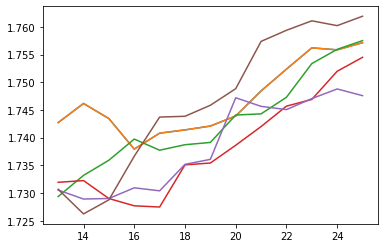

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(detailed_result['renyi_entropy_score'].T)

plt.show()

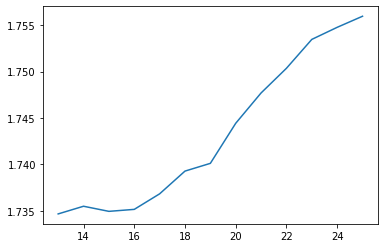

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(detailed_result['renyi_entropy_score'].T.mean(axis=1))

plt.show()

In [16]:
import pickle

with open("detailed_result_rtl.p", "wb") as f:
    pickle.dump(detailed_result, f)

In [17]:
import gc

del optimizer
gc.collect()

37977

In [19]:
tm = TopicModel.load("./num_topics_experiments/e68cc1ff_experiment_-1/##13h32m50s_20d02m2020y###")

In [39]:
df.sum().sum() / 

45.55873354960354

In [45]:
df.mean().mean() * 25/24

0.07593122258267256

In [42]:
T = 25
2/(T * (T - 1)) * sum(condensed_distances)

0.07593122258267256

In [24]:
phi.shape

(367454, 25)

In [25]:
25 * 24 / 2

300.0